In [46]:
import gpflow
import tensorflow as tf
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

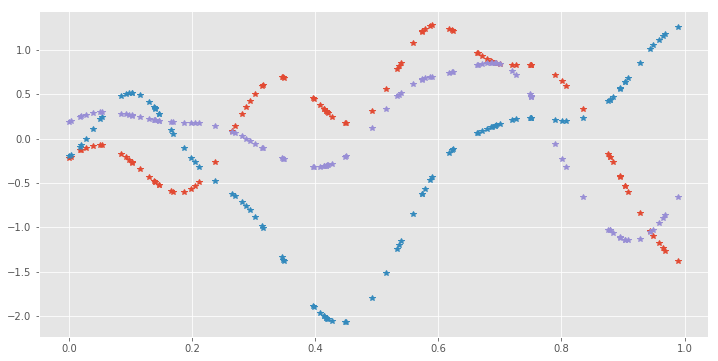

In [47]:
#make a one dimensional classification problem
np.random.seed(1)
X = np.random.rand(100,1)
K = np.exp(-0.5*np.square(X - X.T)/0.01) + np.eye(100)*1e-6
f = np.dot(np.linalg.cholesky(K), np.random.randn(100,3))

plt.figure(figsize=(12,6))
plt.plot(X, f, '*')

In [48]:
Y = np.array(np.argmax(f, 1).reshape(-1,1), dtype=float)
# print(X)
# X[::5]

In [49]:
class_num = 4
m = gpflow.models.SVGP(
    X, Y, kern=gpflow.kernels.Matern32(1) + gpflow.kernels.White(1, variance=0.01),
    likelihood=gpflow.likelihoods.MultiClass(class_num),
    Z=X[::6].copy(), num_latent=class_num, whiten=True, q_diag=True)

# m.kern.white.variance.trainable = False
# m.feature.trainable = False
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
SVGP/feature/Z,Parameter,None,(none),True,"(17, 1)",True,"[[0.417022004702574], [0.1862602113776709], [0..."
SVGP/kern/kernels/0/lengthscales,Parameter,None,+ve,True,(),True,1.0
SVGP/kern/kernels/0/variance,Parameter,None,+ve,True,(),True,1.0
SVGP/kern/kernels/1/variance,Parameter,None,+ve,True,(),True,0.01
SVGP/likelihood/invlink/epsilon,Parameter,"Beta(0.2,5.0)","[0.0, 1.0]",False,(),True,0.001
SVGP/q_mu,Parameter,None,(none),True,"(17, 4)",True,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
SVGP/q_sqrt,Parameter,None,+ve,True,"(17, 4)",True,"[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [..."


In [50]:
opt = gpflow.train.ScipyOptimizer()
opt.minimize(m)

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 80.815313
  Number of iterations: 1000
  Number of functions evaluations: 1171


INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 80.815313
  Number of iterations: 1000
  Number of functions evaluations: 1171


In [51]:
def plot(m):
    f = plt.figure(figsize=(12,6))
    a1 = f.add_axes([0.05, 0.05, 0.9, 0.6])
    a2 = f.add_axes([0.05, 0.7, 0.9, 0.1])
    a3 = f.add_axes([0.05, 0.85, 0.9, 0.1])


    xx = np.linspace(m.X.read_value().min(), m.X.read_value().max(), 200).reshape(-1,1)
    mu, var = m.predict_f(xx)
    mu, var = mu.copy(), var.copy()
    p, _ = m.predict_y(xx)
#     print(p)

    a3.set_xticks([])
    a3.set_yticks([])


    a3.set_xticks([])
    a3.set_yticks([])

    for i in range(m.likelihood.num_classes - 1):
        x = m.X.read_value()[m.Y.read_value().flatten()==i]
        points, = a3.plot(x, x*0, '.')
        color=points.get_color()
#         a1.plot(xx, mu[:,i], color=color, lw=2)
#         a1.plot(xx, mu[:,i] + 2*np.sqrt(var[:,i]), '--', color=color)
#         a1.plot(xx, mu[:,i] - 2*np.sqrt(var[:,i]), '--', color=color)
        a2.plot(xx, p[:,i], '-', color=color, lw=2)


    a2.set_ylim(-0.1, 1.1)
    a2.set_yticks([0, 1])
    a2.set_xticks([])

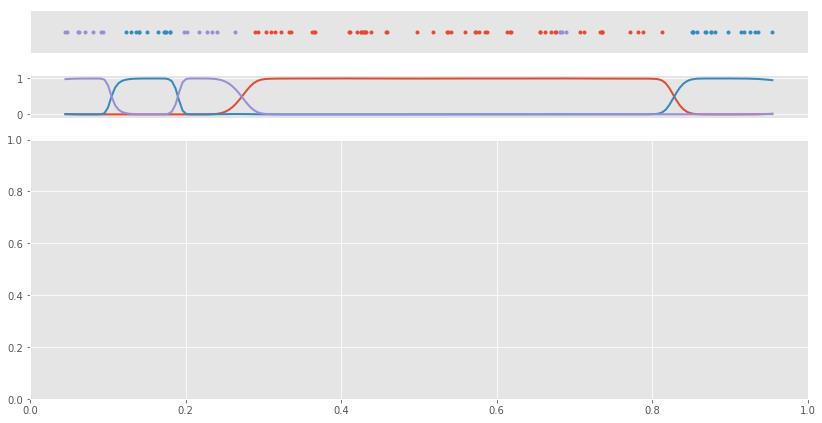

In [52]:
plot(m)

In [11]:
m.kern.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
SVGP/kern/kernels/0/lengthscales,Parameter,None,+ve,True,(),True,0.11126064118544769
SVGP/kern/kernels/0/variance,Parameter,None,+ve,True,(),True,2.3905435205869376
SVGP/kern/kernels/1/variance,Parameter,None,+ve,True,(),True,0.0003187264686972141
